In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
train=pd.read_csv("D:\\Datascience\\SSN SACE\\Project\\Kaggle\\Titanic - Machine learning from disaster\\train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#brief about dataset columns and number of non null entries in each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
#no of unique values in the data
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
Title           17
dtype: int64

In [5]:
#a statistical description of columns with numerical values
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
#No of null values in each column
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

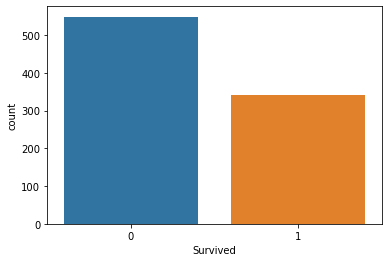

In [45]:
#survival and non survival numbers
sns.countplot(x='Survived',data=train)

From survival rate it is clear the dataset is not a balanced data

Age, cabin and embarked features has missing values.  For cabin 77% of values are missing hence it is adviceable to drop the field while modelling.

<AxesSubplot:>

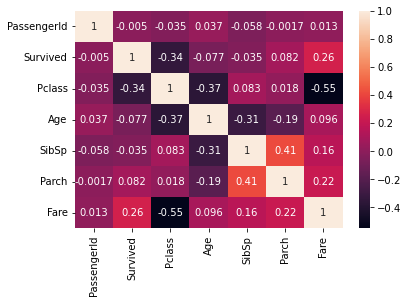

In [8]:
#checking whether any corelation exists among the columns
data_corr=train.corr()
sns.heatmap(data_corr,annot=True)

It can be observed that, columns of the dataset are not corelated

In [10]:
#survuval ratio
survival=train.groupby('Survived').count()
survival_ratio=survival['Pclass'][1]/train.count()['Pclass']
survival_ratio.round(4)

0.3838

It is observed that only 38% of passengers survived and from barplot it is clear the data is not a balanced dataset.

<AxesSubplot:xlabel='Survived', ylabel='count'>

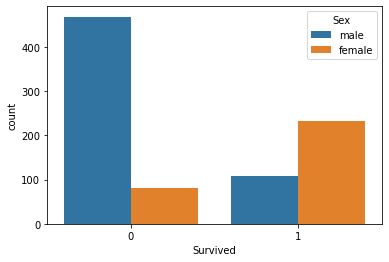

In [11]:
#survival and non survival numbers by gender
sns.countplot(x='Survived',hue='Sex',data=train)

In [12]:
#survival ratio by gender
gender=train.groupby(['Sex','Survived']).count()
men_ratio=gender['Pclass']['male'][1]/(gender['Pclass'][2]+gender['Pclass'][3])
print('Men ratio',men_ratio.round(3))
women_ratio=gender['Pclass']['female'][1]/(gender['Pclass'][0]+gender['Pclass'][1])
print('Women ratio',women_ratio.round(3))

Men ratio 0.189
Women ratio 0.742


From above plot and ratios it is clear that survivors ratio of female is nearly four times that of male and fatality rate is high for male than female.

<AxesSubplot:xlabel='Survived', ylabel='count'>

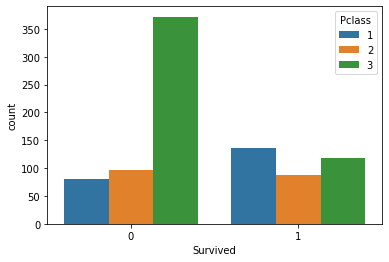

In [13]:
#survival and non survival numbers by passenger class
sns.countplot(x='Survived',hue='Pclass',data=train)

In [14]:
#survival ratio by passenger class
pclass=train.groupby(['Pclass','Survived']).count()
class1=pclass['Name'][1][1]/(pclass['Name'][1][0]+pclass['Name'][1][1])
class2=pclass['Name'][2][1]/(pclass['Name'][2][0]+pclass['Name'][2][1])
class3=pclass['Name'][3][1]/(pclass['Name'][3][0]+pclass['Name'][3][1])
print('Class 1 ratio',class1.round(3),'\n','Class 2 ratio',class2.round(3),'\n','Class 3 ratio',class3.round(3),)

Class 1 ratio 0.63 
 Class 2 ratio 0.473 
 Class 3 ratio 0.242


From above plot and ratios, the passengers of higher socio-economic class were given high priority to board the life boats than remaining classes.

<AxesSubplot:xlabel='Survived', ylabel='count'>

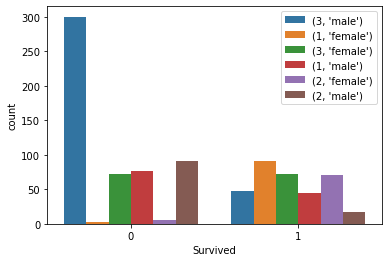

In [15]:
#survival and non survival numbers by gender and passenger class
sns.countplot(x='Survived',hue=train[['Pclass', 'Sex']].apply(tuple, axis=1),data=train)

In [49]:
#checking for surival of any passenger above 60
train[(train['Age']>60) & (train['Survived']==1)].sum()['Survived']

C:\Users\91814\AppData\Local\Temp\ipykernel_24216\2077269293.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train[(train['Age']>60) & (train['Survived']==1)].sum()['Survived']


5

Male survival rate is low and female survival rate is high among all classes.  Female of class 1 has high surival rate.

<AxesSubplot:xlabel='Age', ylabel='Count'>

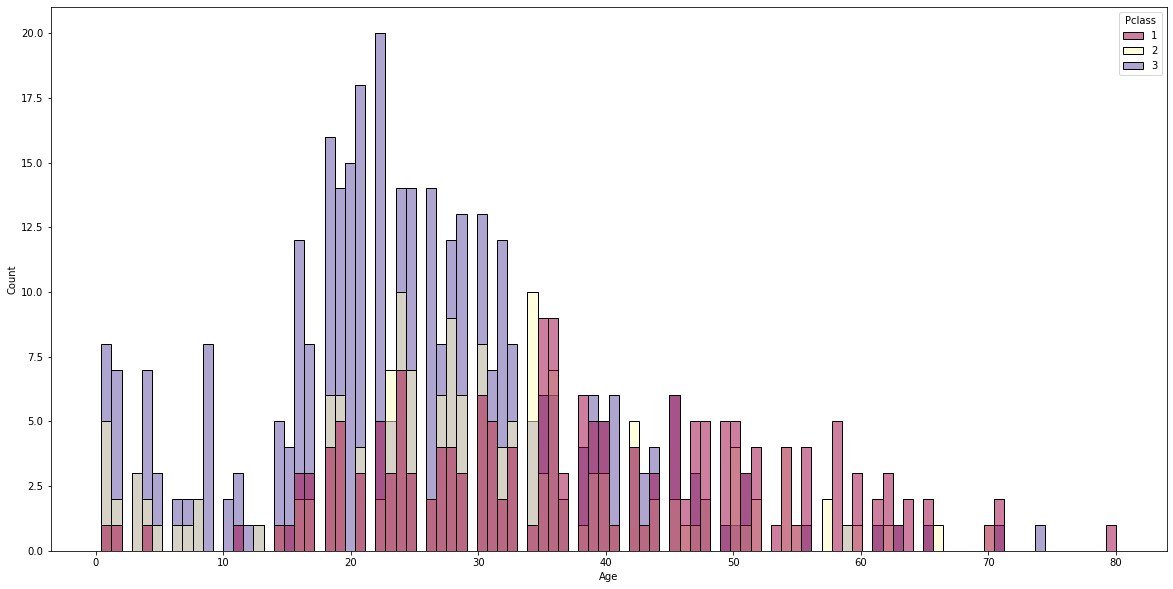

In [16]:
#distribution of age by passenger class
plt.figure(figsize=(20,10))
sns.histplot(x=train['Age'],bins=100,hue=train['Pclass'],palette='Spectral')

Most of passengers are from 3rd class between age group 15 to 35

<AxesSubplot:xlabel='Age', ylabel='Count'>

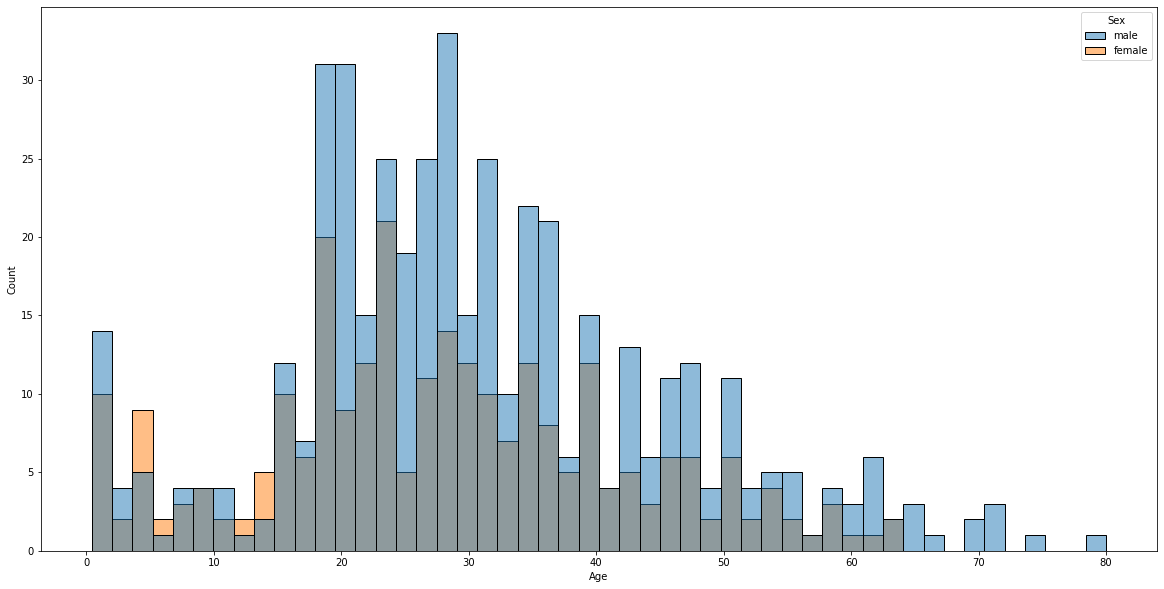

In [17]:
#distribution of age by gender
plt.figure(figsize=(20,10))
sns.histplot(x=train['Age'],bins=50,hue=train['Sex'])

Both male and female high counts between age group 20 to 35 and least count for older age

<AxesSubplot:xlabel='Age', ylabel='Count'>

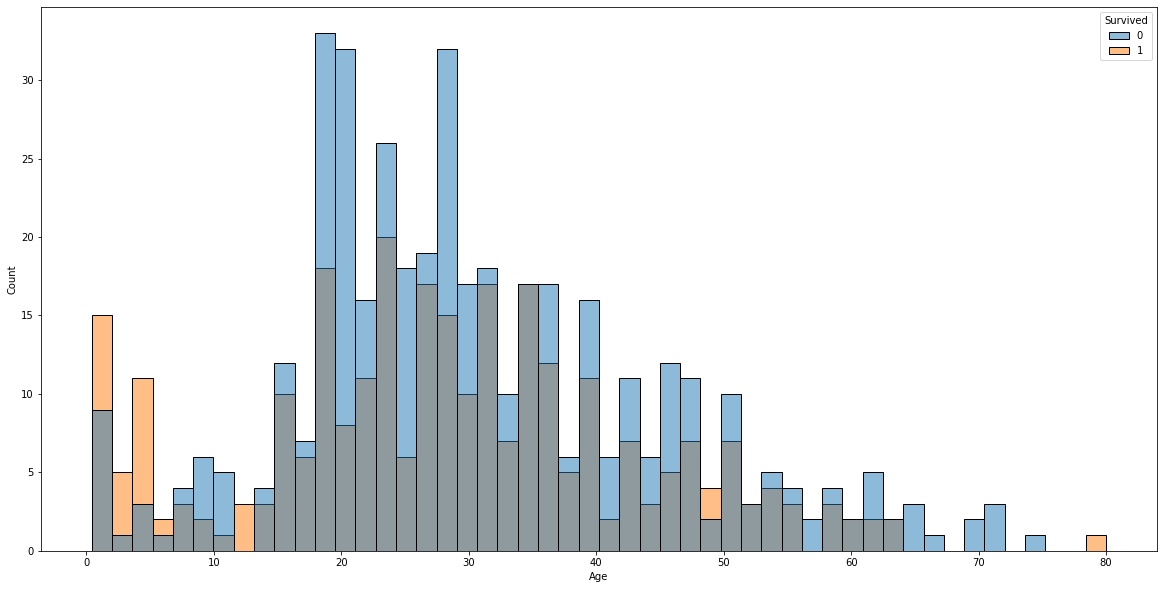

In [18]:
#distribution of age by survived or not
plt.figure(figsize=(20,10))
sns.histplot(x=train['Age'],bins=50,hue=train['Survived'])

Kids aged between 0 to 5 have higher survival ratios

<AxesSubplot:xlabel='Survived', ylabel='count'>

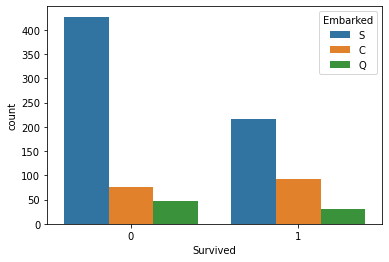

In [20]:
#count of passengers survived based on their place of boarding
sns.countplot(x='Survived',hue='Embarked',data=train)

Place of boarding has no effects survival

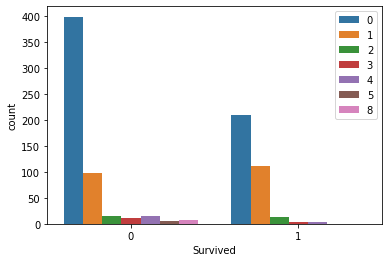

In [21]:
#Survival and fatality counts by family
sns.countplot(x='Survived',hue='SibSp',data=train)
plt.legend(loc='upper right')

Passengers who traveled alone have high surival as well as fatality rates than passengers accompained and survival rate decreases as number of 
dependents increases

<AxesSubplot:xlabel='Survived', ylabel='count'>

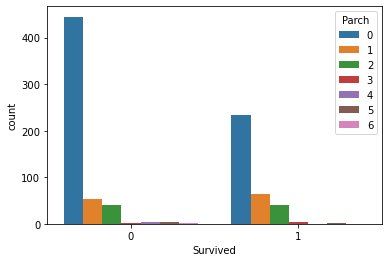

In [22]:
#Survival and fatality counts by family
sns.countplot(x='Survived',hue='Parch',data=train)

Similar pattern is observed as in previous visualization

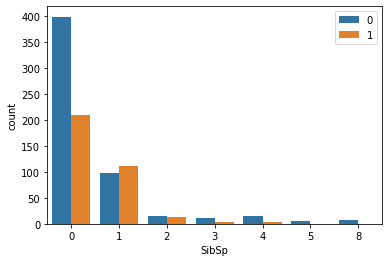

In [46]:
#Survival and fatality counts by family
sns.countplot(x='SibSp',hue='Survived',data=train)
plt.legend(loc='upper right')

Above chart justifies the inferences found in previous chart of passengers travelled with family

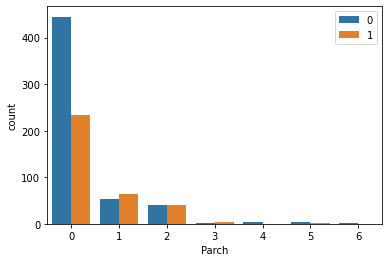

In [24]:
#Survival and fatality counts by family
sns.countplot(x='Parch',hue='Survived',data=train)
plt.legend(loc='upper right')

Above chart justifies the inferences found in previous chart of passengers travelled with family

In [51]:
age_null=train[pd.isnull(train['Age'])]
age_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Mr


In [42]:
train['Title']=train['Name'].apply(lambda name:name.split(',')[1].split('.')[0].strip())
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [43]:
grouped_gender_pclass_title=train.groupby(['Sex','Pclass','Title'])
grouped_gender_pclass_title.count()

PassengerId  Survived  Name  Age  SibSp  Parch  \
Sex    Pclass Title                                                          
female 1      Dr                      1         1     1    1      1      1   
              Lady                    1         1     1    1      1      1   
              Miss                   46        46    46   45     46     46   
              Mlle                    2         2     2    2      2      2   
              Mme                     1         1     1    1      1      1   
              Mrs                    42        42    42   34     42     42   
              the Countess            1         1     1    1      1      1   
       2      Miss                   34        34    34   32     34     34   
              Mrs                    41        41    41   41     41     41   
              Ms                      1         1     1    1      1      1   
       3      Miss                  102       102   102   69    102    102   
              Mrs                    42        42    42   33     42     42   
male   1      Capt                    1         1     1    1      1      1   
              Col                     2         2     2    2      2      2   
              Don                     1         1     1    1      1      1   
              Dr                      4         4     4    3      4      4   
              Jonkheer                1         1     1    1      1      1   
              Major                   2         2     2    2      2      2   
              Master                  3         3     3    3      3      3   
              Mr                    107       107   107   87    107    107   
              Sir                     1         1     1    1      1      1   
       2      Dr                      2         2     2    2      2      2   
              Master                  9         9     9    9      9      9   
              Mr                     91        91    91   82     91     91   
              Rev                     6         6     6    6      6      6   
       3      Master                 28        28    28   24     28     28   
              Mr                    319       319   319  229    319    319   

                            Ticket  Fare  Cabin  Embarked  
Sex    Pclass Title                                        
female 1      Dr                 1     1      1         1  
              Lady               1     1      1         1  
              Miss              46    46     39        45  
              Mlle               2     2      2         2  
              Mme                1     1      1         1  
              Mrs               42    42     36        41  
              the Countess       1     1      1         1  
       2      Miss              34    34      5        34  
              Mrs               41    41      5        41  
              Ms                 1     1      0         1  
       3      Miss             102   102      3       102  
              Mrs               42    42      3        42  
male   1      Capt               1     1      1         1  
              Col                2     2      1         2  
              Don                1     1      0         1  
              Dr                 4     4      2         4  
              Jonkheer           1     1      0         1  
              Major              2     2      2         2  
              Master             3     3      3         3  
              Mr               107   107     85       107  
              Sir                1     1      1         1  
       2      Dr                 2     2      0         2  
              Master             9     9      3         9  
              Mr                91    91      3        91  
              Rev                6     6      0         6  
       3      Master            28    28      1        28  
              Mr               319   319      5       319

In [30]:
grouped_gender_pclass_title['Sex'].count()

Sex     Pclass  Title       
female  1       Dr                1
                Lady              1
                Miss             46
                Mlle              2
                Mme               1
                Mrs              42
                the Countess      1
        2       Miss             34
                Mrs              41
                Ms                1
        3       Miss            102
                Mrs              42
male    1       Capt              1
                Col               2
                Don               1
                Dr                4
                Jonkheer          1
                Major             2
                Master            3
                Mr              107
                Sir               1
        2       Dr                2
                Master            9
                Mr               91
                Rev               6
        3       Master           28
                Mr              319

In [31]:
grouped_gender_pclass_title['Age'].median()

Sex     Pclass  Title       
female  1       Dr              49.0
                Lady            48.0
                Miss            30.0
                Mlle            24.0
                Mme             24.0
                Mrs             41.5
                the Countess    33.0
        2       Miss            24.0
                Mrs             32.0
                Ms              28.0
        3       Miss            18.0
                Mrs             31.0
male    1       Capt            70.0
                Col             58.0
                Don             40.0
                Dr              44.0
                Jonkheer        38.0
                Major           48.5
                Master           4.0
                Mr              40.0
                Sir             49.0
        2       Dr              38.5
                Master           1.0
                Mr              31.0
                Rev             46.5
        3       Master           4.0
         

1. only 38% of passengers survived
2. survival ratio of women is nearly 4 times that of men
3. survival ratio of 1st class is high followed by 2nd and 3rd class
4. 3rd class male fatality number is high than of 2nd and 1st classes 
5. same above scenario is observed for females also
6. survided male numbers of all classes are nearly the same
7. survided females number are more than survived males under all classes
8. from age distribution it is assumed that most survived males of 2nd and 3rd classes are kids
9. the above stated assumption is justified with distribution of age classified by gender
10. from age distribution it is clear that high fatalities are between age group 19 to 30 (with point 3 and 4 assuming primarly 3rd class)
11. when it comes to survivors either with or without family, the numbers of survivors and non survivors are high for passengers who travelled alone
and the number of survivors or non survivors reduced with increase in family size
